In [78]:
install.packages("pacman")
install.packages("corrplot")
install.packages("pheatmap")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("ggfortify")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
set.seed(42)

In [6]:
pacman::p_load(janitor,magrittr,pacman,psych,rio,tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



janitor installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



psych installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’



rio installed



In [8]:
df<-import("/content/optdigits.csv")%>% as_tibble()

In [11]:
head(df,5)

X0,X1,X6,X15,X12,X1.1,X0.1,X0.2,X0.3,X7,⋯,X0.21,X0.22,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,X0.26
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,10,16,6,0,0,0,0,7,⋯,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,⋯,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,⋯,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,⋯,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,⋯,3,0,0,10,16,16,16,16,6,2


In [12]:
dim(df)

[1] 3822   65

In [13]:
str(df)

tibble [3,822 × 65] (S3: tbl_df/tbl/data.frame)
 $ X0   : int [1:3822] 0 0 0 0 0 0 0 0 0 0 ...
 $ X1   : int [1:3822] 0 0 0 0 0 0 0 0 0 0 ...
 $ X6   : int [1:3822] 10 8 0 5 11 1 8 15 3 6 ...
 $ X15  : int [1:3822] 16 15 3 14 16 11 10 2 13 14 ...
 $ X12  : int [1:3822] 6 16 11 4 10 13 8 14 13 14 ...
 $ X1.1 : int [1:3822] 0 13 16 0 1 11 7 13 2 16 ...
 $ X0.1 : int [1:3822] 0 0 0 0 0 7 2 2 0 16 ...
 $ X0.2 : int [1:3822] 0 0 0 0 0 0 0 0 0 8 ...
 $ X0.3 : int [1:3822] 0 0 0 0 0 0 0 0 0 0 ...
 $ X7   : int [1:3822] 7 1 0 0 4 0 1 0 6 0 ...
 $ X16  : int [1:3822] 16 11 5 13 16 9 15 16 16 7 ...
 $ X6.1 : int [1:3822] 8 9 16 8 10 14 14 15 12 11 ...
 $ X6.2 : int [1:3822] 16 11 11 0 15 6 12 12 10 8 ...
 $ X10  : int [1:3822] 5 16 13 0 8 4 12 13 8 10 ...
 $ X0.4 : int [1:3822] 0 1 7 0 0 3 4 8 0 15 ...
 $ X0.5 : int [1:3822] 0 0 0 0 0 0 0 0 0 3 ...
 $ X0.6 : int [1:3822] 0 0 0 0 0 0 0 0 0 0 ...
 $ X8   : int [1:3822] 11 0 3 3 4 0 7 2 9 0 ...
 $ X16.1: int [1:3822] 16 0 15 14 16 16 15 16 15 0 ...

In [14]:
glimpse(df)

Rows: 3,822
Columns: 65
$ X0    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X1    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ X6    <int> 10, 8, 0, 5, 11, 1, 8, 15, 3, 6, 0, 0, 7, 7, 10, 0, 5, 1, 0, 4, …
$ X15   <int> 16, 15, 3, 14, 16, 11, 10, 2, 13, 14, 3, 4, 12, 11, 15, 1, 12, 8…
$ X12   <int> 6, 16, 11, 4, 10, 13, 8, 14, 13, 14, 16, 13, 6, 11, 8, 11, 16, 1…
$ X1.1  <int> 0, 13, 16, 0, 1, 11, 7, 13, 2, 16, 11, 16, 2, 6, 0, 7, 16, 13, 1…
$ X0.1  <int> 0, 0, 0, 0, 0, 7, 2, 2, 0, 16, 1, 16, 0, 0, 0, 0, 3, 2, 4, 15, 1…
$ X0.2  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X0.3  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X7    <int> 7, 1, 0, 0, 4, 0, 1, 0, 6, 0, 0, 0, 0, 9, 6, 0, 0, 4, 0, 0, 2, 0…
$ X16   <int> 16, 11, 5, 13, 16, 9, 15, 16, 16, 7, 0, 8, 16, 16, 16, 2, 11, 16…
$ X6.1  <int> 8, 9, 16, 8, 10, 14, 14, 15, 12, 11, 8, 16, 16, 12, 7, 13, 11, 8…
$ X6.2  <int> 16

In [15]:
any(is.na(df))

[1] FALSE

In [16]:
colSums(is.na(df))

X0    X1    X6   X15   X12  X1.1  X0.1  X0.2  X0.3    X7   X16  X6.1  X6.2 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
  X10  X0.4  X0.5  X0.6    X8 X16.1    X2  X0.7   X11  X2.1  X0.8  X0.9    X5 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
X16.2    X3 X0.10  X5.1  X7.1 X0.11 X0.12  X7.2   X13  X3.1 X0.13  X8.1  X7.3 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
X0.14 X0.15    X4 X12.1 X0.16  X1.2 X13.1  X5.2 X0.17 X0.18 X0.19   X14    X9 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
X15.1  X9.1 X0.20 X0.21 X0.22 X0.23  X6.3 X14.1  X7.4  X1.3 X0.24 X0.25 X0.26 
    0     0     0     0     0     0     0     0     0     0     0     0     0

# Pairwise correlation heatmap

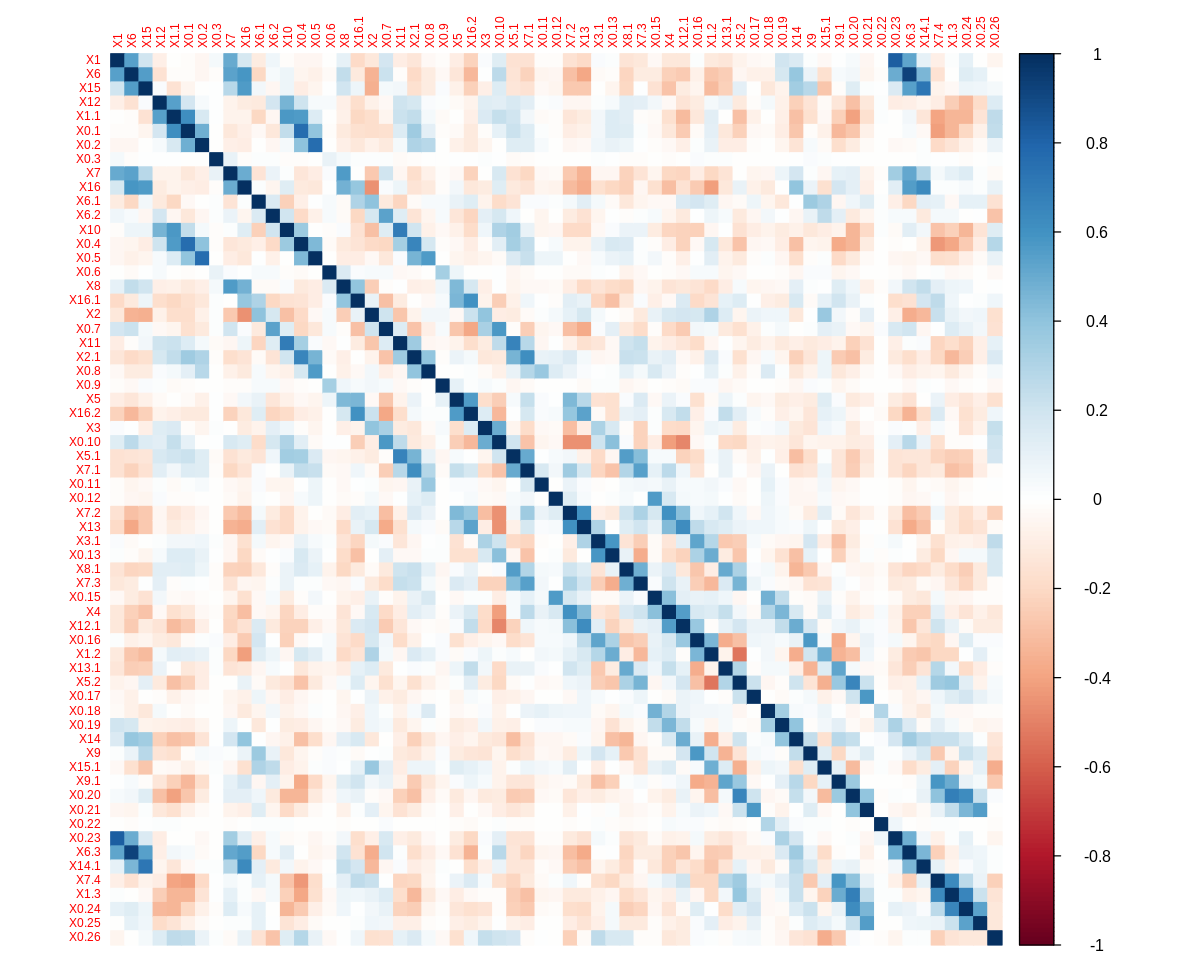

In [26]:
# Install repr if not already installed
if(!require(repr)) install.packages("repr")

library(repr)

# Set plot size (in inches)
options(repr.plot.width=10, repr.plot.height=8)

library(corrplot)
df_filtered <- df[, sapply(df, function(x) sd(x) != 0)]
corr_matrix <- cor(df_filtered)
corrplot(corr_matrix, method = "color", tl.cex=0.6)


# Heatmap of the entire data matrix

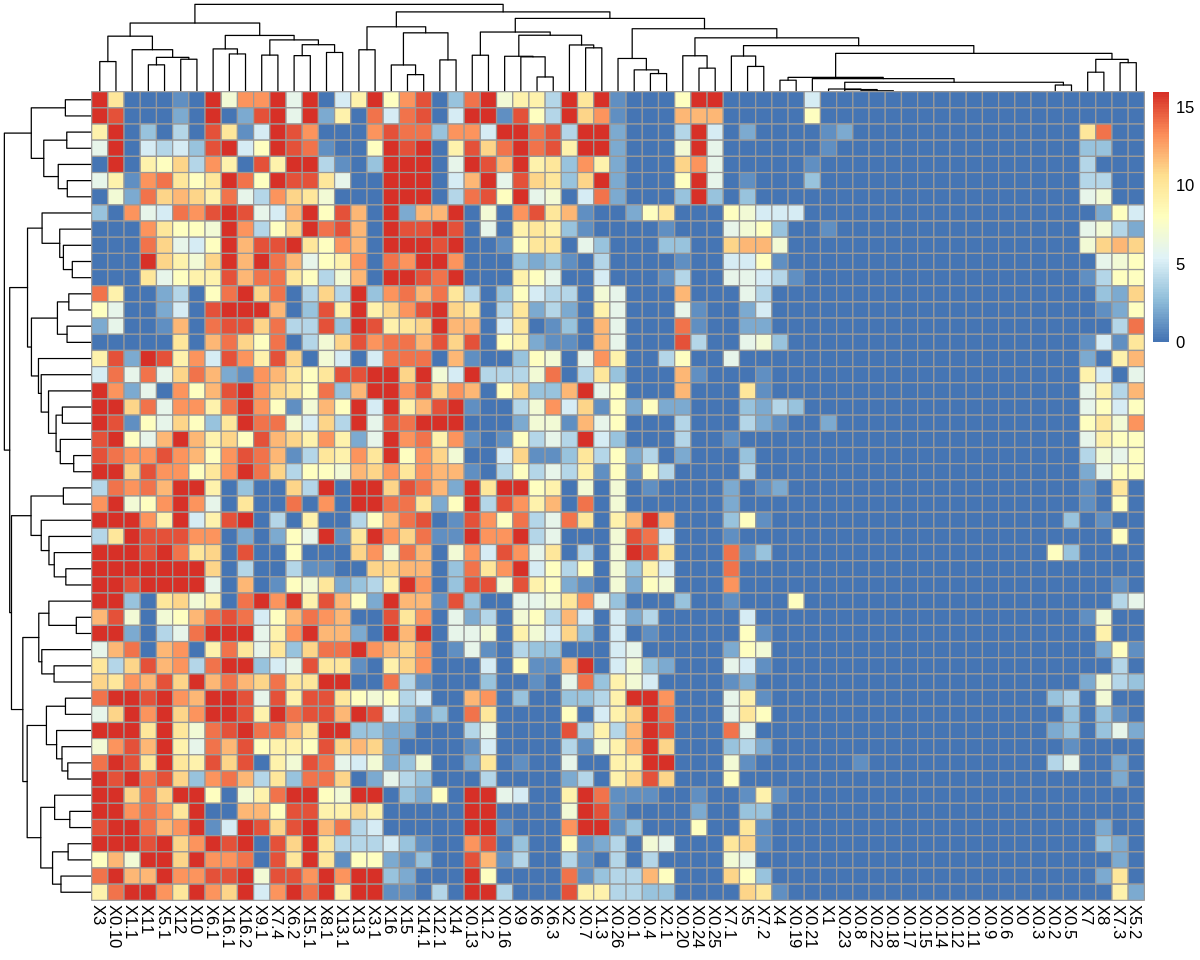

In [29]:
library(pheatmap)
pheatmap(as.matrix(df[1:50, ]))

# Boxplots per feature or subset

No id variables; using all as measure variables



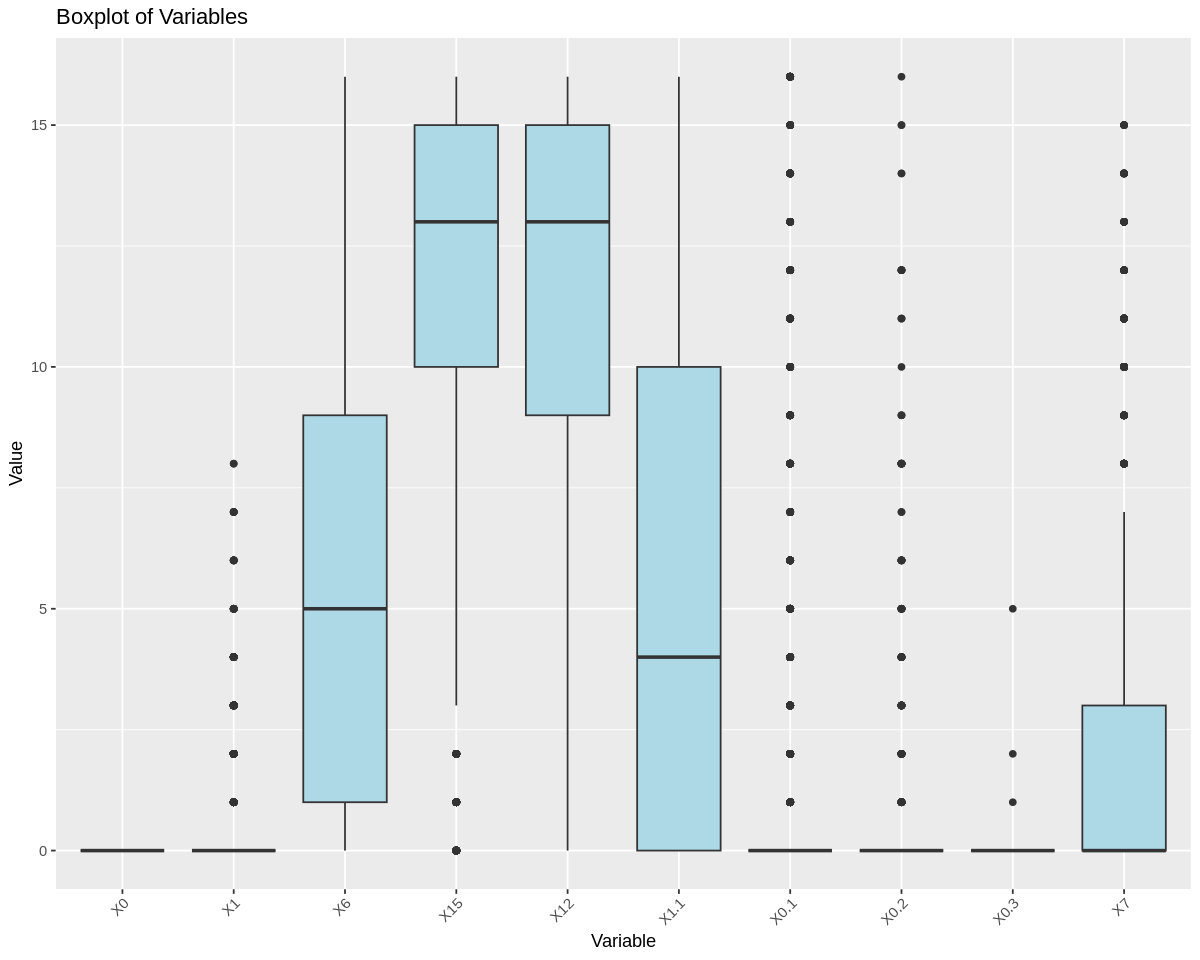

In [34]:
library(reshape2)
library(ggplot2)
df_melt<-melt(df[,1:10])
ggplot(df_melt, aes(x = variable, y = value)) +geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot of Variables", x = "Variable", y = "Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [41]:
sds <- apply(df, 2, sd)
zero_variance_cols <- names(df)[sds == 0]
print(zero_variance_cols)

[1] "X0"    "X0.14"


# PCA (Principal Component Analysis) scatter plot

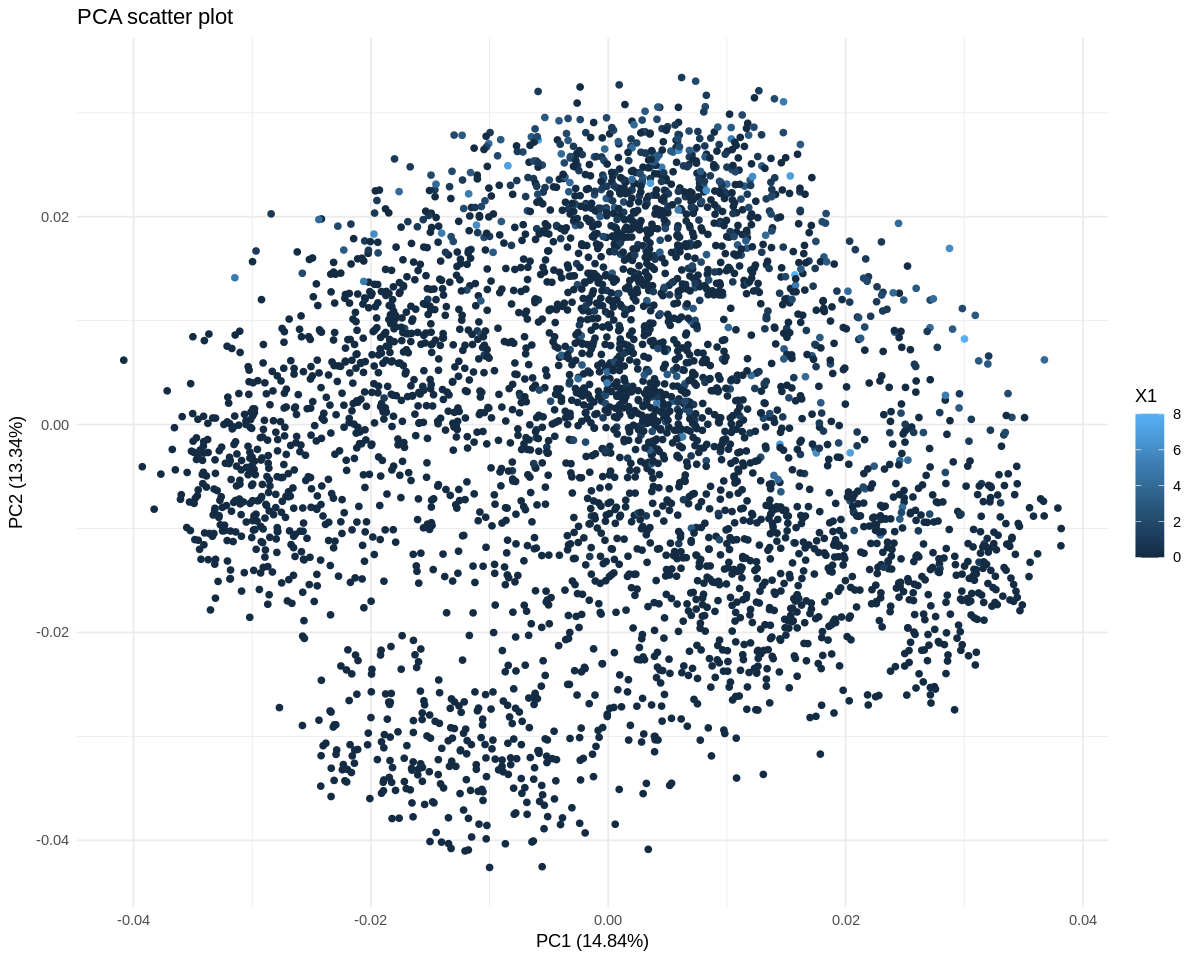

In [46]:
library(ggfortify)

# Run PCA on the full dataset (all columns) without scaling
pca_res <- prcomp(df, scale. = FALSE)

# Plot the PCA results
autoplot(pca_res,data=df,colour="X1")+labs(title="PCA scatter plot")+theme_minimal()

# Histograms or density plots per feature

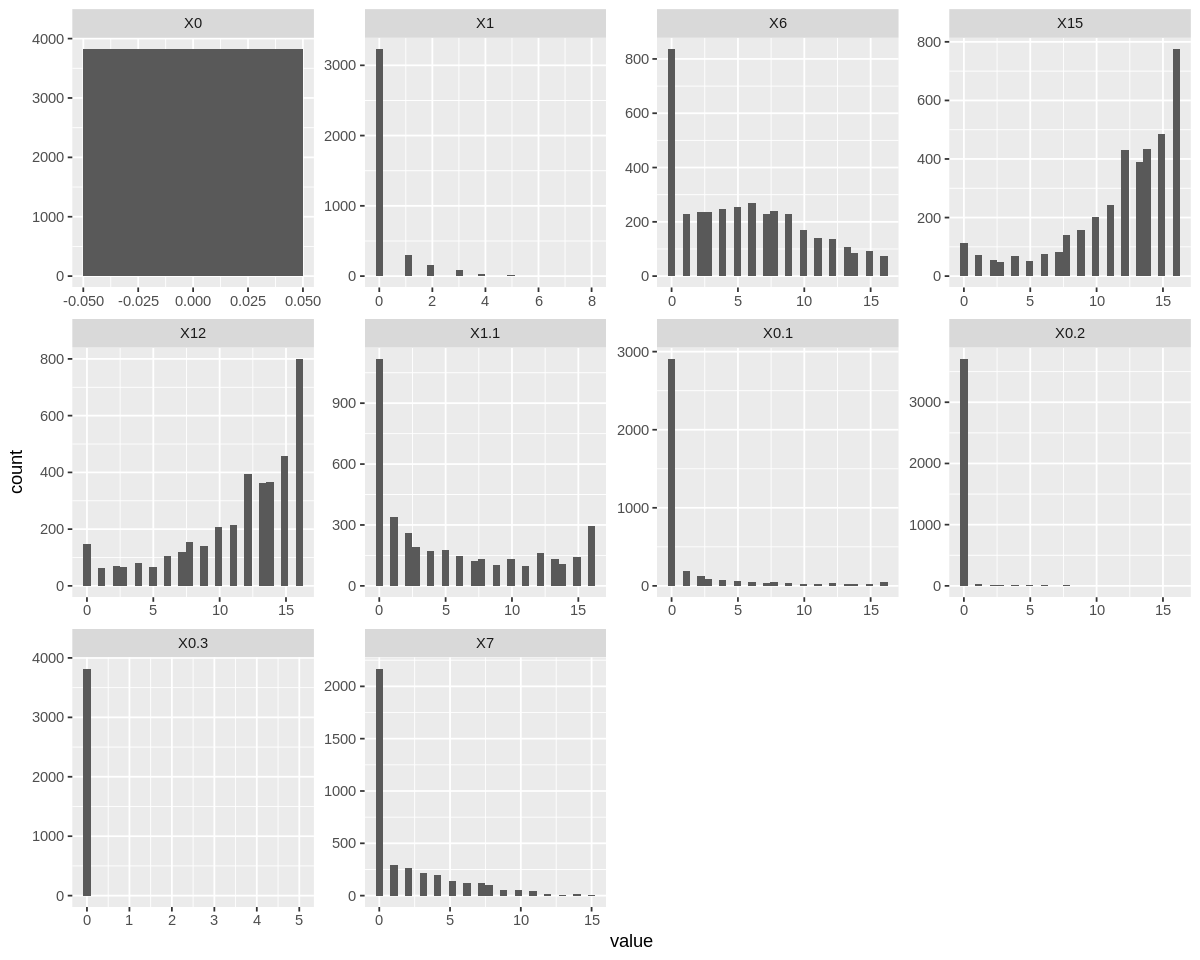

In [47]:
ggplot(df_melt, aes(x=value)) + geom_histogram(bins=30) + facet_wrap(~variable, scales = "free")

 # Feature importance or variance barplot

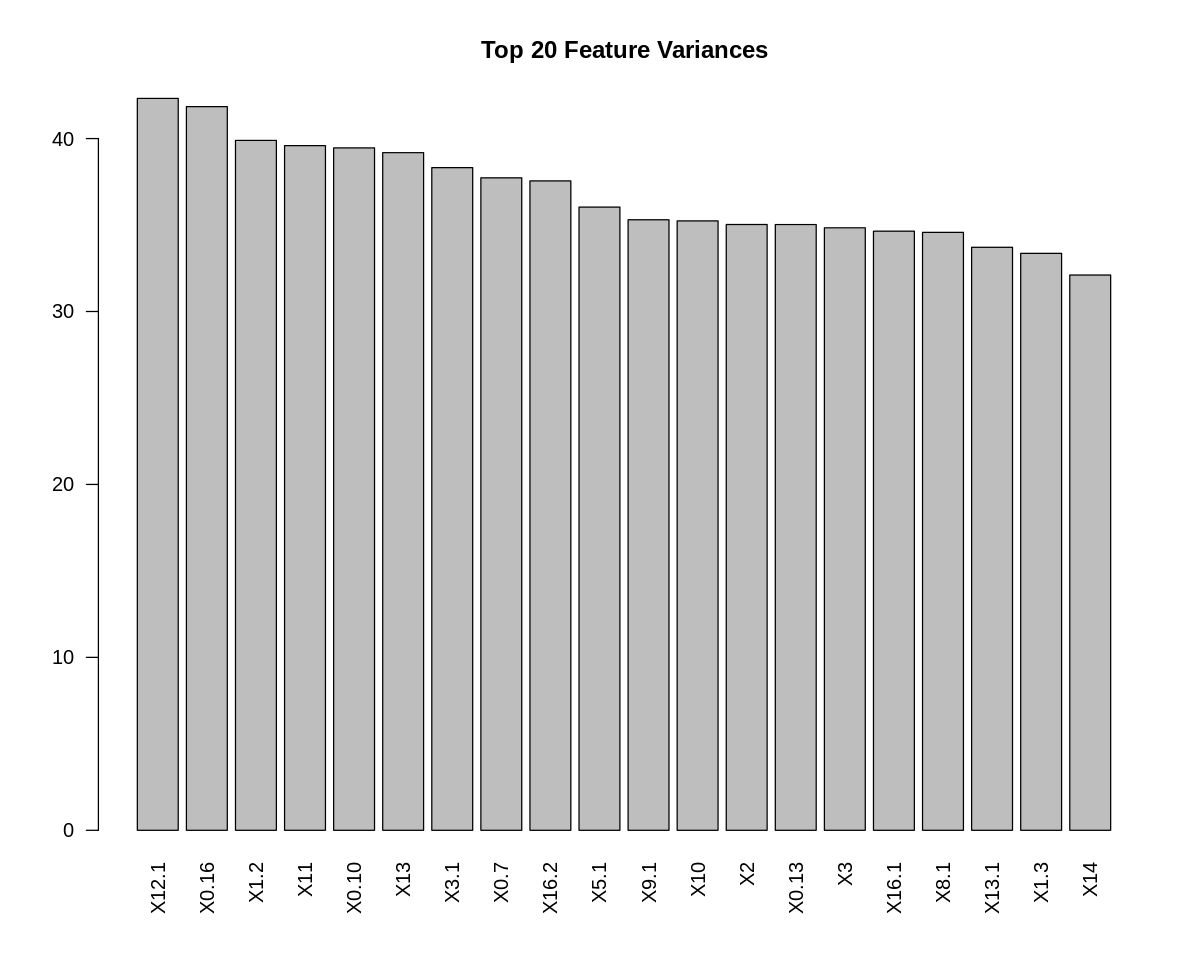

In [48]:
vars <- apply(df, 2, var)
barplot(sort(vars, decreasing = TRUE)[1:20], las=2, main="Top 20 Feature Variances")


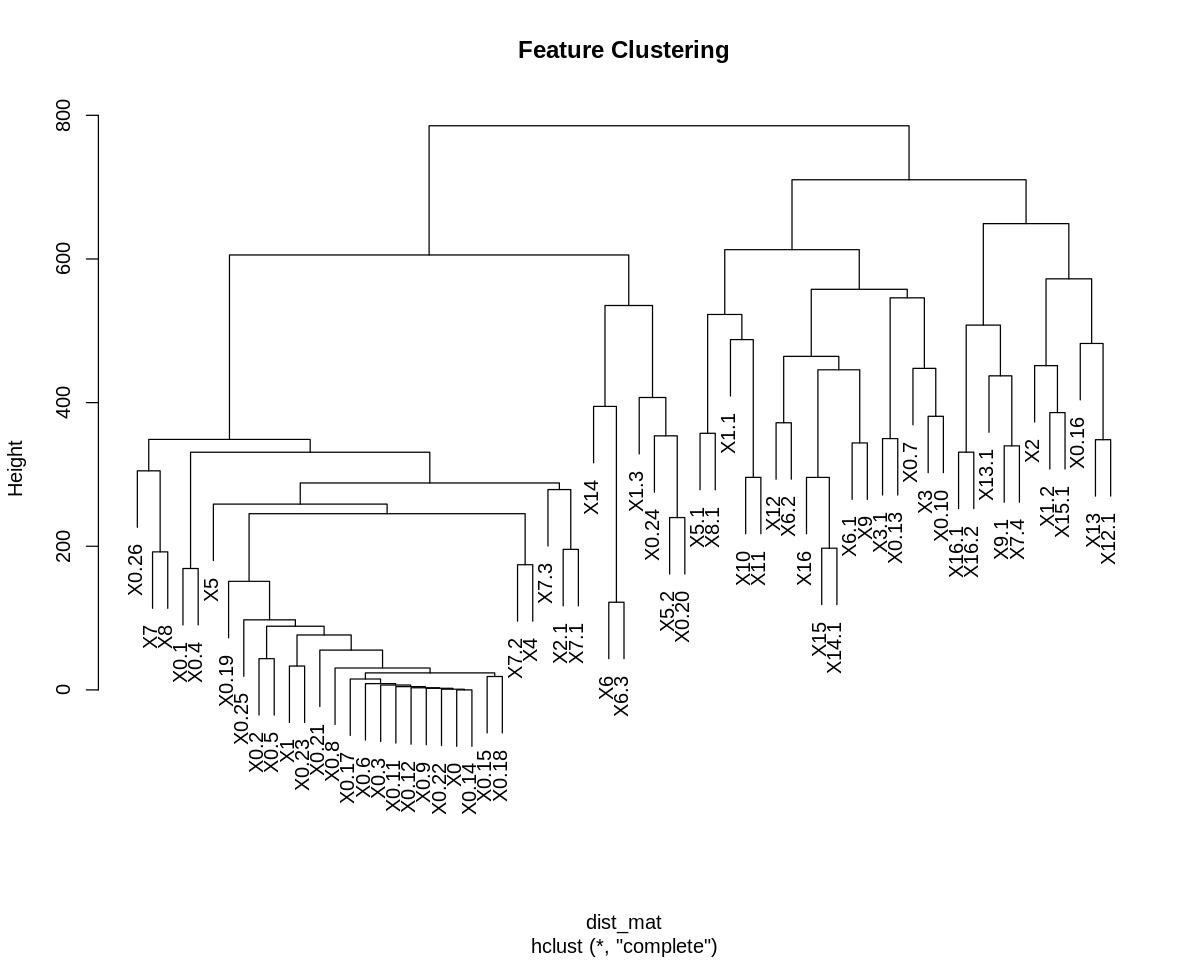

In [49]:
dist_mat <- dist(t(df))
hc <- hclust(dist_mat)
plot(hc, main="Feature Clustering")


In [50]:
df%<>%rename(y=X0.26)%>%mutate(y=as_factor(y))

In [51]:
head(df,5)

X0,X1,X6,X15,X12,X1.1,X0.1,X0.2,X0.3,X7,⋯,X0.21,X0.22,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,y
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,0,10,16,6,0,0,0,0,7,⋯,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,⋯,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,⋯,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,⋯,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,⋯,3,0,0,10,16,16,16,16,6,2


In [52]:
df%>%pull(y)%>%fct_count()

f,n
<fct>,<int>
0,375
1,389
2,380
3,389
4,387
5,376
6,377
7,387
8,380


In [53]:
head(df,5)

X0,X1,X6,X15,X12,X1.1,X0.1,X0.2,X0.3,X7,⋯,X0.21,X0.22,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,y
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,0,10,16,6,0,0,0,0,7,⋯,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,⋯,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,⋯,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,⋯,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,⋯,3,0,0,10,16,16,16,16,6,2


# Count the Unique Labels in y



In [55]:
unique_labels<-unique(df$y)
num_labels<-length(unique_labels)
print(unique_labels)
print(paste("Number of unique labels in y:", num_labels))

 [1] 0 7 4 6 2 5 8 1 9 3
Levels: 0 1 2 3 4 5 6 7 8 9
[1] "Number of unique labels in y: 10"


#  Create a Count Plot for y in R



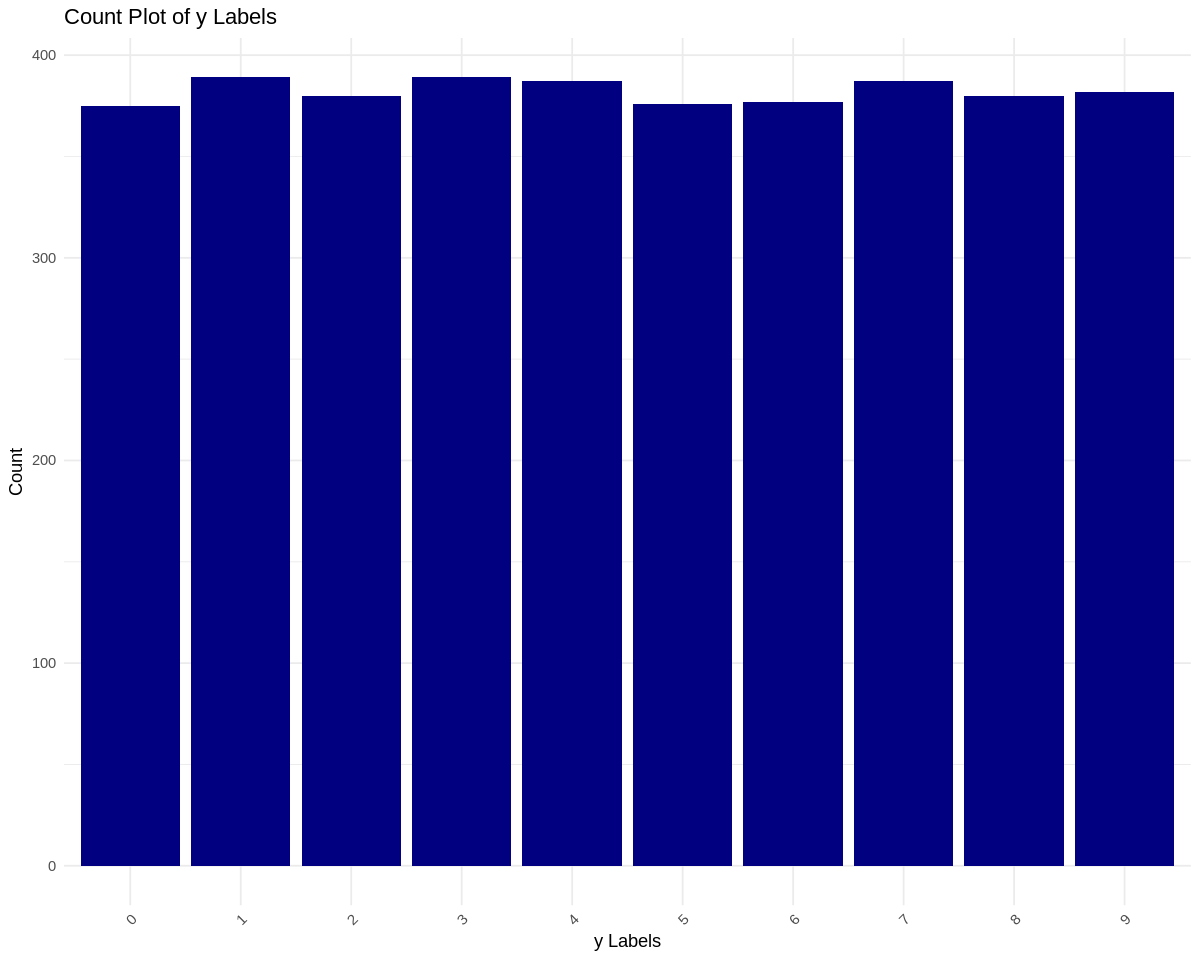

In [57]:
# Load ggplot2 for visualization
library(ggplot2)

# Create a count plot for y
ggplot(df, aes(x = y)) +
  geom_bar(fill = "navy") +  # Use geom_bar to count occurrences of each label
  labs(title = "Count Plot of y Labels", x = "y Labels", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability

In [58]:
df%<>%filter(y==1 | y==3 | y==6)%>%mutate(y=fct_drop(y))

In [59]:
df%>%pull(y)%>%fct_count()

f,n
<fct>,<int>
1,389
3,389
6,377


In [61]:
unique_labels<-unique(df$y)
print(unique_labels)

[1] 6 1 3
Levels: 1 3 6


In [62]:
df %<>% remove_constant()

In [65]:
head(df,5)

X1,X6,X15,X12,X1.1,X0.1,X0.2,X7,X16,X6.1,⋯,X0.20,X0.21,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,y
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,5,14,4,0,0,0,0,13,8,⋯,12,0,0,4,12,14,7,0,0,6
0,0,3,16,11,1,0,0,0,8,⋯,0,0,0,0,2,14,14,1,0,1
0,7,11,11,6,0,0,9,16,12,⋯,12,0,0,14,16,12,10,1,0,3
0,9,13,1,0,0,0,0,8,16,⋯,8,5,0,4,15,16,16,16,16,1
0,0,10,12,0,0,0,0,9,14,⋯,14,0,0,1,11,14,12,1,0,6


In [66]:
set.seed(42)
train_indices<-sample(1:nrow(df),size=0.7*nrow(df))
train_data<-df[train_indices,]
test_data<-df[-train_indices,]

In [67]:
dim(train_data)  # Should be ~2,675 rows (70% of 3,822)
dim(test_data)   # Should be ~1,147 rows (30% of 3,822)



[1] 808  56

[1] 347  56

In [69]:
if (!require(randomForest)) install.packages("randomForest")
library(randomForest)

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:psych’:

    outlier




# Train Random Forest Model

In [70]:
rf_model<-randomForest(y~.,data=train_data,ntree=100,importance=TRUE)

In [72]:
rf_model


Call:
 randomForest(formula = y ~ ., data = train_data, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 7

        OOB estimate of  error rate: 0.74%
Confusion matrix:
    1   3   6 class.error
1 277   1   0 0.003597122
3   3 262   0 0.011320755
6   2   0 263 0.007547170

#  Evaluate Model Performance



In [73]:
test_prediction<-predict(rf_model,newdata=test_data)
test_actual<-test_data$y

In [80]:
# Load caret (already installed)
library(caret)

# Create a confusion matrix
conf_matrix <- confusionMatrix(test_prediction, test_actual)

# Print the confusion matrix and performance metrics
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   1   3   6
         1 111   0   0
         3   0 124   0
         6   0   0 112

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9894, 1)
    No Information Rate : 0.3573     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 3 Class: 6
Sensitivity            1.0000   1.0000   1.0000
Specificity            1.0000   1.0000   1.0000
Pos Pred Value         1.0000   1.0000   1.0000
Neg Pred Value         1.0000   1.0000   1.0000
Prevalence             0.3199   0.3573   0.3228
Detection Rate         0.3199   0.3573   0.3228
Detection Prevalence   0.3199   0.3573   0.3228
Balanced Accuracy      1.0000   1.0000   1.0000


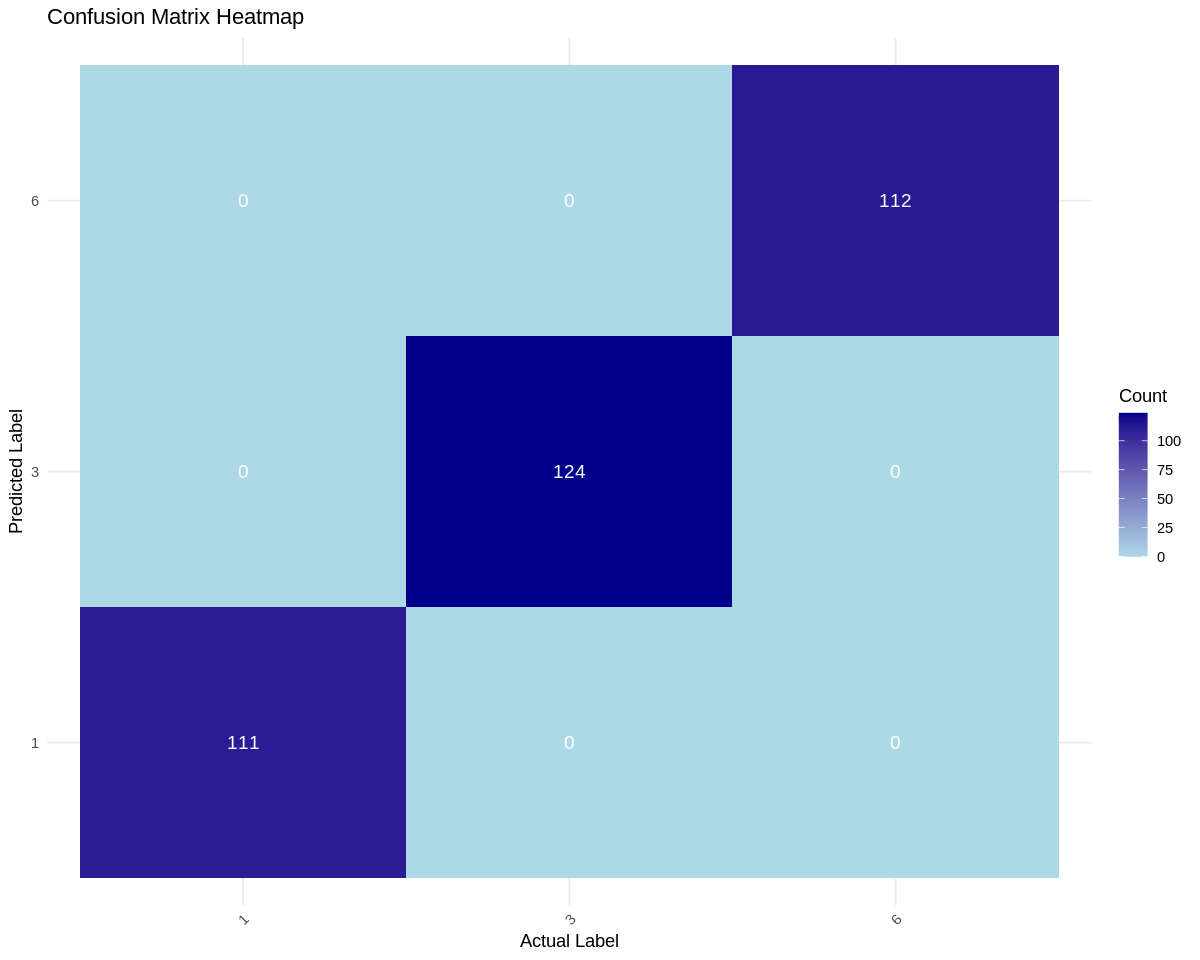

In [81]:
# Install and load ggplot2
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Extract the confusion matrix as a table
cm_table <- conf_matrix$table

# Convert to a data frame for ggplot2
cm_df <- as.data.frame(as.table(cm_table))
colnames(cm_df) <- c("Predicted", "Actual", "Count")

# Create the heatmap
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Count)) +
  geom_tile() +
  geom_text(aes(label = Count), color = "white", size = 4) +
  scale_fill_gradient(low = "lightblue", high = "darkblue", name = "Count") +
  labs(title = "Confusion Matrix Heatmap", x = "Actual Label", y = "Predicted Label") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [82]:
accuracy <- conf_matrix$overall["Accuracy"]
print(paste("Accuracy:", round(accuracy, 4)))

[1] "Accuracy: 1"


In [83]:
# Extract per-class metrics
class_metrics <- conf_matrix$byClass

# Extract relevant metrics: Precision, Recall, F1, and Support
# Support isn't directly in byClass, but we can get it from the confusion matrix
support <- as.data.frame(table(test_actual))
colnames(support) <- c("Class", "Support")

# Create a classification report data frame
# We need to clean up the row names of class_metrics to match the class labels
class_labels <- gsub("Class: ", "", rownames(class_metrics))
classification_report <- data.frame(
  Class = class_labels,
  Precision = class_metrics[, "Pos Pred Value"],
  Recall = class_metrics[, "Sensitivity"],
  F1 = class_metrics[, "F1"],
  Support = support$Support[match(class_labels, support$Class)]
)

# Round the metrics for readability
classification_report[, 2:4] <- round(classification_report[, 2:4], 4)

# Print the classification report
print(classification_report)

         Class Precision Recall F1 Support
Class: 1     1         1      1  1     111
Class: 3     3         1      1  1     124
Class: 6     6         1      1  1     112
